In [1]:
!pip install texthero

     |████████████████████████████████| 235 kB 9.5 MB/s 
     |████████████████████████████████| 1.5 MB 46.6 MB/s 
     |████████████████████████████████| 749 kB 50.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('drive/My Drive/NTC/NTC.csv')

In [6]:
df.head()

,Text,category
0,lifestyle governs mobile choice faster bett...,TECH
1,moving mobile improves golf swing a mobile pho...,TECH
2,bt boosts its broadband packages british telec...,TECH
3,peer-to-peer nets here to stay peer-to-peer ...,TECH
4,pompeii gets digital make-over the old-fashion...,TECH


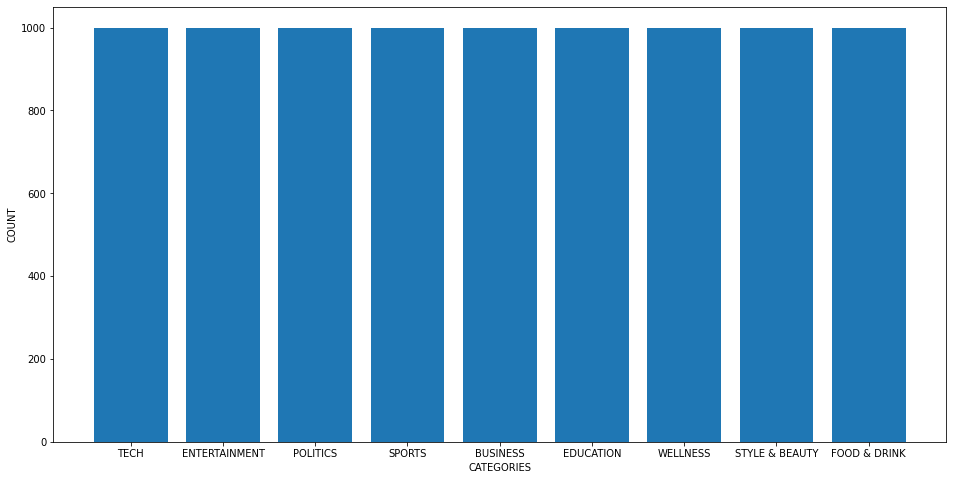

In [7]:
categories=df['category'].unique()
count=np.array(df['category'].value_counts())

plt.rcParams["figure.figsize"] = (16,8)
plt.xlabel('CATEGORIES')
plt.ylabel('COUNT')
plt.bar(categories,count)
plt.show()

In [8]:
!pip install tensorflow-text 

     |████████████████████████████████| 4.9 MB 7.4 MB/s 
     |████████████████████████████████| 462 kB 61.8 MB/s 


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [10]:
import tensorflow as tf
print(tf.__version__)
print(hub.__version__)
print(text.__version__)

2.8.0
0.12.0
2.8.2


In [11]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


# USING BERT

### Data Cleaning and Vectorization

In [12]:
bert_preprocess = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")  
bert_encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [13]:
#cleaning the text data
df['Text'] = hero.clean(df['Text'])


In [14]:
vectors_1=[]
for i in categories:
  T=df[df['category']==i]['Text'][:500]
  bp=bert_preprocess(T)
  be=bert_encoder(bp)['pooled_output']
  vectors_1.append(be)
print(len(vectors_1))
print(len(vectors_1[0]))
print(vectors_1[0])


9
500
tf.Tensor(
[[-0.71811736 -0.29613528  0.0204109  ... -0.03950692 -0.46839988
   0.6838525 ]
 [-0.6639139  -0.24776408  0.31306913 ...  0.10773205 -0.34708464
   0.56992114]
 [-0.719594   -0.44590586 -0.45840815 ... -0.12719172 -0.55573994
   0.6431317 ]
 ...
 [-0.8398725  -0.72090477 -0.96539545 ... -0.9000882  -0.70714355
   0.83730745]
 [-0.8646125  -0.56751835 -0.8798459  ... -0.7127086  -0.71338063
   0.88484156]
 [-0.89939487 -0.5427844  -0.7387086  ... -0.40879944 -0.6660037
   0.86907756]], shape=(500, 768), dtype=float32)


In [15]:
vectors_2=[]
for i in categories:
  T=df[df['category']==i]['Text'][500:]
  bp=bert_preprocess(T)
  be=bert_encoder(bp)['pooled_output']
  vectors_2.append(be)
print(len(vectors_2))
print(len(vectors_2[0]))
print(vectors_2[0])

9
500
tf.Tensor(
[[-0.7375261  -0.32195225 -0.42294118 ... -0.7375519  -0.20355599
   0.6688485 ]
 [-0.73201287 -0.25359616 -0.25521323 ... -0.20241445 -0.33447063
   0.5960446 ]
 [-0.7718002  -0.39519298 -0.21395539 ...  0.23507817 -0.6038068
   0.8700905 ]
 ...
 [-0.8605115  -0.55129063 -0.8621437  ... -0.5052788  -0.67196566
   0.8555567 ]
 [-0.67518485 -0.12461834 -0.43771052 ... -0.1524258  -0.512523
   0.73451805]
 [-0.67495644 -0.20808241  0.6057056  ...  0.48406813 -0.5003169
   0.6555964 ]], shape=(500, 768), dtype=float32)


In [16]:
#1000 records... per category 500 and 500 formate[[500,500],[500,500]......]
Vectors_=[]
for i,j in enumerate(zip(vectors_1,vectors_2)):
    Vectors_.append(list(j))
print(len(Vectors_))
print(len(Vectors_[0]))
print(Vectors_)

9
2
[[<tf.Tensor: shape=(500, 768), dtype=float32, numpy=
array([[-0.71811736, -0.29613528,  0.0204109 , ..., -0.03950692,
        -0.46839988,  0.6838525 ],
       [-0.6639139 , -0.24776408,  0.31306913, ...,  0.10773205,
        -0.34708464,  0.56992114],
       [-0.719594  , -0.44590586, -0.45840815, ..., -0.12719172,
        -0.55573994,  0.6431317 ],
       ...,
       [-0.8398725 , -0.72090477, -0.96539545, ..., -0.9000882 ,
        -0.70714355,  0.83730745],
       [-0.8646125 , -0.56751835, -0.8798459 , ..., -0.7127086 ,
        -0.71338063,  0.88484156],
       [-0.89939487, -0.5427844 , -0.7387086 , ..., -0.40879944,
        -0.6660037 ,  0.86907756]], dtype=float32)>, <tf.Tensor: shape=(500, 768), dtype=float32, numpy=
array([[-0.7375261 , -0.32195225, -0.42294118, ..., -0.7375519 ,
        -0.20355599,  0.6688485 ],
       [-0.73201287, -0.25359616, -0.25521323, ..., -0.20241445,
        -0.33447063,  0.5960446 ],
       [-0.7718002 , -0.39519298, -0.21395539, ...,  0.23507

In [17]:
#formate [500,500,500,500....]
Vectors_18=[]
for i in range(len(Vectors_)):
  for j in range(len(Vectors_[i])):
    Vectors_18.append(Vectors_[i][j])
print(len(Vectors_18))
print(len(Vectors_18[0]))
print(Vectors_18)

18
500
[<tf.Tensor: shape=(500, 768), dtype=float32, numpy=
array([[-0.71811736, -0.29613528,  0.0204109 , ..., -0.03950692,
        -0.46839988,  0.6838525 ],
       [-0.6639139 , -0.24776408,  0.31306913, ...,  0.10773205,
        -0.34708464,  0.56992114],
       [-0.719594  , -0.44590586, -0.45840815, ..., -0.12719172,
        -0.55573994,  0.6431317 ],
       ...,
       [-0.8398725 , -0.72090477, -0.96539545, ..., -0.9000882 ,
        -0.70714355,  0.83730745],
       [-0.8646125 , -0.56751835, -0.8798459 , ..., -0.7127086 ,
        -0.71338063,  0.88484156],
       [-0.89939487, -0.5427844 , -0.7387086 , ..., -0.40879944,
        -0.6660037 ,  0.86907756]], dtype=float32)>, <tf.Tensor: shape=(500, 768), dtype=float32, numpy=
array([[-0.7375261 , -0.32195225, -0.42294118, ..., -0.7375519 ,
        -0.20355599,  0.6688485 ],
       [-0.73201287, -0.25359616, -0.25521323, ..., -0.20241445,
        -0.33447063,  0.5960446 ],
       [-0.7718002 , -0.39519298, -0.21395539, ...,  0.235

In [18]:
X=[]
for i in range(len(Vectors_18)):
  for j in range(len(Vectors_18[0])):
    X.append(Vectors_18[i][j])
print(len(X))

9000


In [19]:
y=df['category']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
le_name_mapping = dict(zip(le.transform(le.classes_),le.classes_))
print(le_name_mapping)

{0: 'BUSINESS', 1: 'EDUCATION', 2: 'ENTERTAINMENT', 3: 'FOOD & DRINK', 4: 'POLITICS', 5: 'SPORTS', 6: 'STYLE & BEAUTY', 7: 'TECH', 8: 'WELLNESS'}


In [20]:
y=df['category']

df['category_id']=le.fit_transform(y)
y=df['category_id']
df

,Text,category,category_id
0,lifestyle governs mobile choice faster better ...,TECH,7
1,moving mobile improves golf swing mobile phone...,TECH,7
2,bt boosts broadband packages british telecom s...,TECH,7
3,peer peer nets stay peer peer p2p networks sta...,TECH,7
4,pompeii gets digital make old fashioned audio ...,TECH,7
...,...,...,...
8995,saber bottle champagne key making party even f...,FOOD & DRINK,3
8996,blood orange chocolate mousse choc awe chocola...,FOOD & DRINK,3
8997,mind boggling food facts learned reddit intrig...,FOOD & DRINK,3
8998,rock star champagne grower producers serge mat...,FOOD & DRINK,3


BUSINESSrelated words:


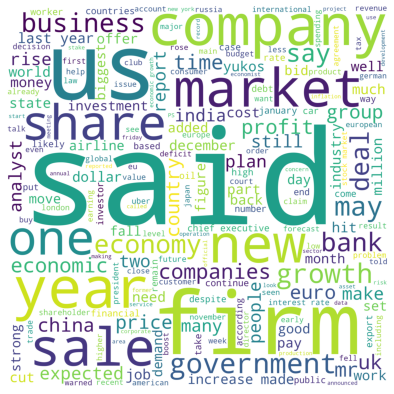

EDUCATIONrelated words:


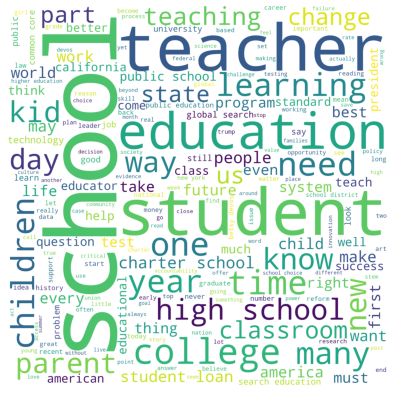

ENTERTAINMENTrelated words:


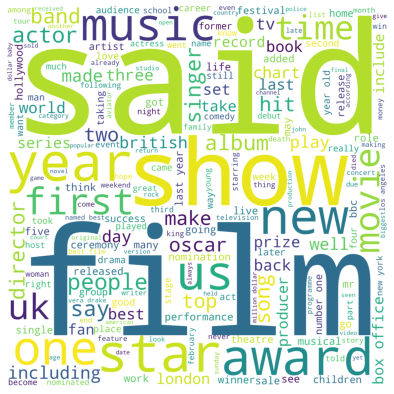

FOOD & DRINKrelated words:


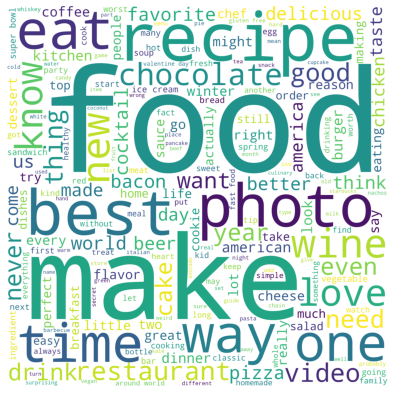

POLITICSrelated words:


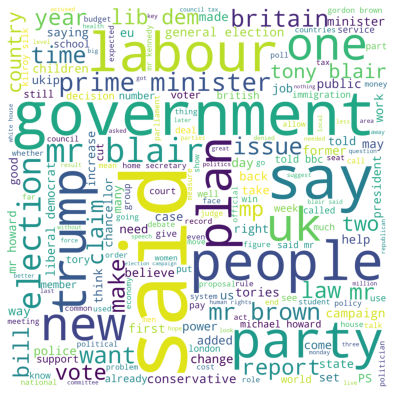

SPORTSrelated words:


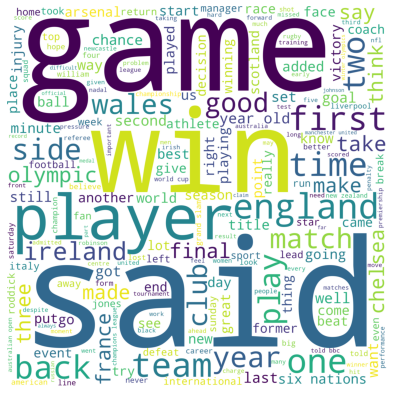

STYLE & BEAUTYrelated words:


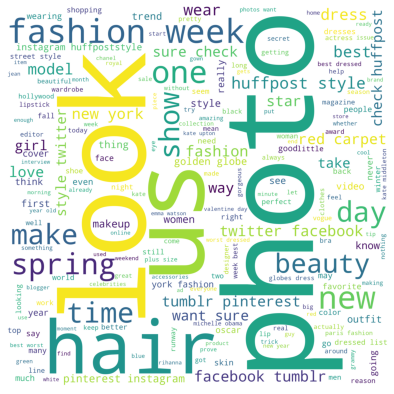

TECHrelated words:


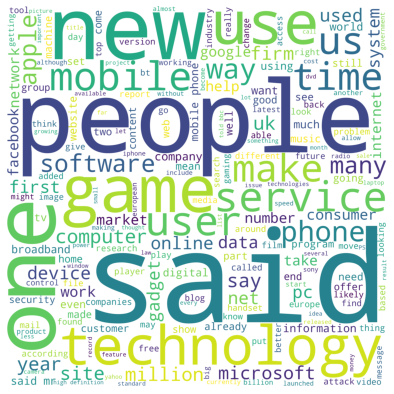

In [30]:
from wordcloud import WordCloud



def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)

  cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])

  wordcloud = WordCloud(background_color = color,width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))

  plt.imshow(wordcloud)

  plt.axis("off")

  plt.show()


for i in range(8):
  category = df[df['category_id'] == i]
  category = category['Text']

  print(le_name_mapping[i]+" related words:")
  wordcloud_draw(category, 'white')


# Splitting train and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

# Peforming Standardization

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=MinMaxScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [23]:
# saving standard scaler object
from joblib import dump,load
dump(ss, 'drive/My Drive/NTC/std_scaler.bin', compress=True)

['drive/My Drive/NTC/std_scaler.bin']

# Model checking with CrossValidation
- cross validation checks the prediction ability of a model

In [ ]:
models=[]


from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(tol=1,max_iter=1000)
models.append(logre)

from sklearn.svm._classes import LinearSVC
lsvc=LinearSVC(tol=1,max_iter=1000)#tol is used to assess levels of multicollinearity. Generally, a tolerance is a threshold which, if crossed, stops the iterations of a solver.
models.append(lsvc)

from sklearn.linear_model import LogisticRegressionCV
logrecv=LogisticRegressionCV(tol=1,max_iter=1000)
models.append(logrecv)

from sklearn.svm import SVC
svc=SVC()
models.append(svc)

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
models.append(sgd)

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
models.append(nb)

from sklearn.tree import  DecisionTreeClassifier
dt=DecisionTreeClassifier()
models.append(dt)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
models.append(rf)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
models.append(knn)

In [ ]:
'''from sklearn.model_selection import KFold,cross_val_score
cv=KFold(10)
scores=[]
for model in models:
  score=cross_val_score(model,X_train_ss,y_train,cv=cv)
  print(str(model).split('(')[0]+' :- ',np.mean(score))
  scores.append(np.mean(score))'''


In [ ]:
mls=[]
for model in models:
  mls.append(str(model).split('(')[0])


In [ ]:
format_scores=[]
for score in scores:
  format_scores.append(int(score*100))

In [ ]:
sorted(format_scores)

In [ ]:
ml_scores= pd.DataFrame({"models": mls,"scores": format_scores})
import seaborn as sns
ml_scores.sort_values('scores')
sns.barplot(x='models',y="scores", data=ml_scores,order=ml_scores.sort_values('scores').models)

# Training and Testing the models

In [24]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(tol=1,max_iter=1000)
logre.fit(X_train_ss,y_train)
print(accuracy_score(y_train,logre.predict(X_train_ss)))
print(accuracy_score(y_test,logre.predict(X_test_ss)))

0.8549629629629629
0.8093333333333333


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logrecv=LogisticRegressionCV(tol=1,max_iter=1000)
logrecv.fit(X_train_ss,y_train)
print(accuracy_score(y_train,logrecv.predict(X_train_ss)))
print(accuracy_score(y_test,logrecv.predict(X_test_ss)))

In [ ]:
from sklearn.svm._classes import LinearSVC
lsvc=LinearSVC(tol=1,max_iter=1000)
lsvc.fit(X_train_ss,y_train)
print(accuracy_score(y_train,lsvc.predict(X_train_ss)))
print(accuracy_score(y_test,lsvc.predict(X_test_ss)))

In [25]:
import pickle
#saving ml model
pickle.dump(logre,open('drive/My Drive/NTC/ntc_model','wb'))

In [26]:
#loading ml model
ntc_model=pickle.load(open('drive/My Drive/NTC/ntc_model','rb'))


In [36]:
ss=load('drive/My Drive/NTC/std_scaler.bin')
#NOTE:- do not creat sclaer objects here just use transofrm fun 
text=input('enter new headline:-')
d_ = pd.DataFrame([text], columns = ['txt'])
text=hero.clean(d_['txt'])
bp_=bert_preprocess(text)
vectors_=bert_encoder(bp_)['pooled_output']
vec=ss.transform(vectors_)
prediction=ntc_model.predict(vec)
print(le_name_mapping[prediction[0]])


enter new headline:-mahesh babu latest film will be released on may 12
ENTERTAINMENT


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(tol=1,max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_ss, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))